In [5]:
# Load the data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('IndividualCompressionData_since_test_20231031_122744.csv')

In [3]:
# Correlation matrix
cols_to_consider = ['CompressedBinSize', 'CompressionTime', 'MAE', 'MSE', 'PSNR', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']
print(data[cols_to_consider].corr())

                                 CompressedBinSize  CompressionTime       MAE  \
CompressedBinSize                         1.000000         0.828408 -0.404662   
CompressionTime                           0.828408         1.000000 -0.480989   
MAE                                      -0.404662        -0.480989  1.000000   
MSE                                      -0.353128        -0.420293  0.982218   
PSNR                                      0.502594         0.566699 -0.932227   
QuadtreeThreshold                        -0.517087        -0.593517  0.687991   
AllowedExceedingThresholdFactor          -0.087653        -0.092104  0.145694   

                                      MSE      PSNR  QuadtreeThreshold  \
CompressedBinSize               -0.353128  0.502594          -0.517087   
CompressionTime                 -0.420293  0.566699          -0.593517   
MAE                              0.982218 -0.932227           0.687991   
MSE                              1.000000 -0.882252    

In [8]:
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
filtered_data = data[data['FileName'] == image_name]

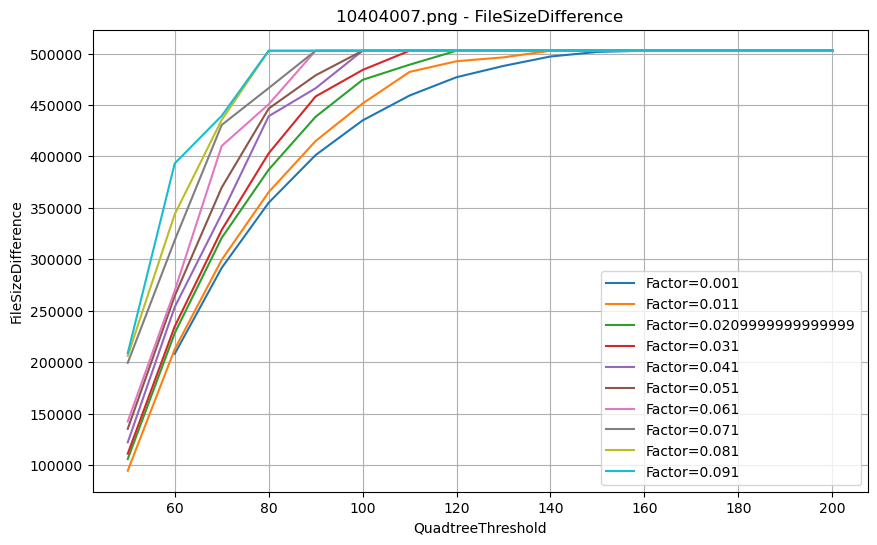

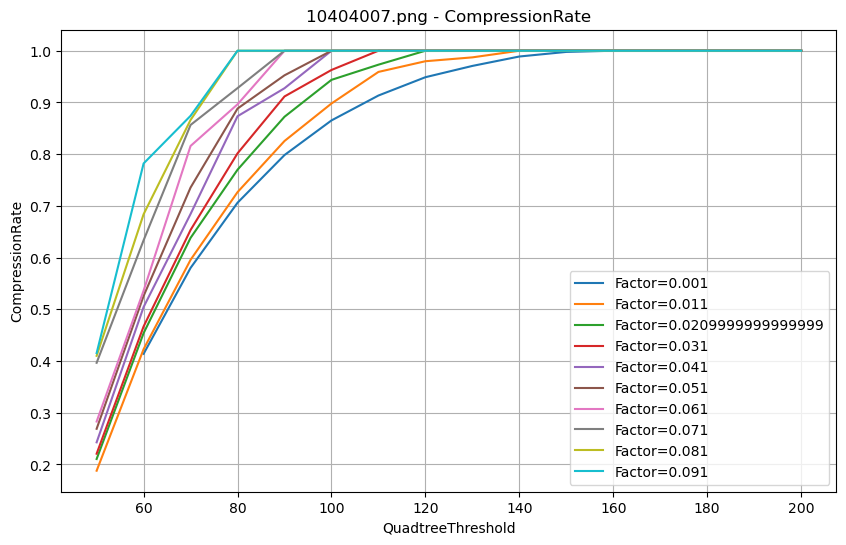

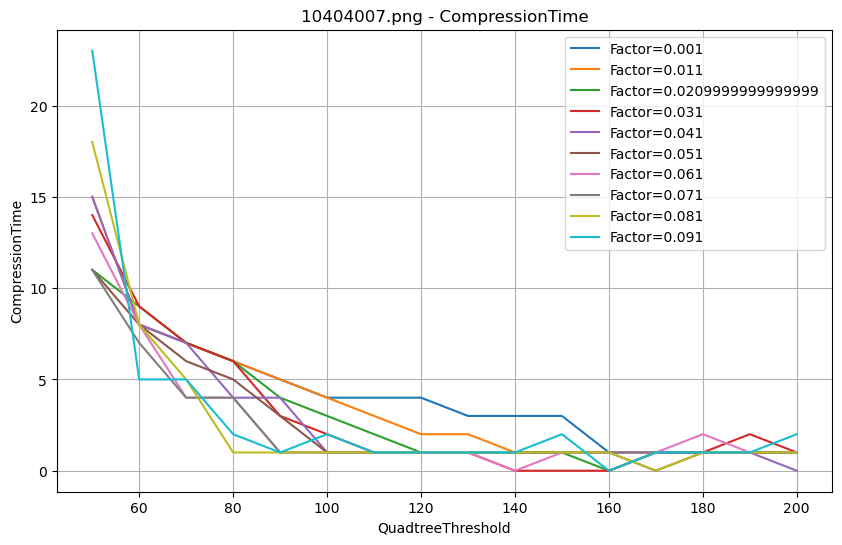

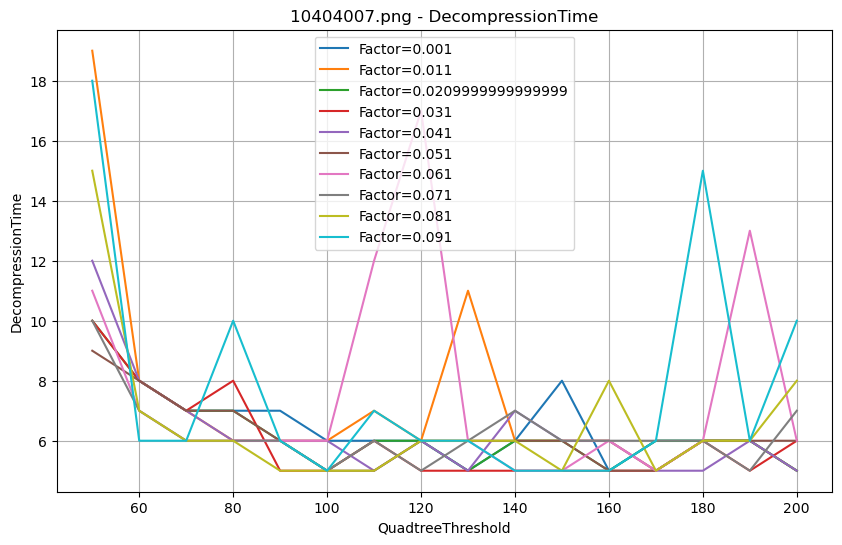

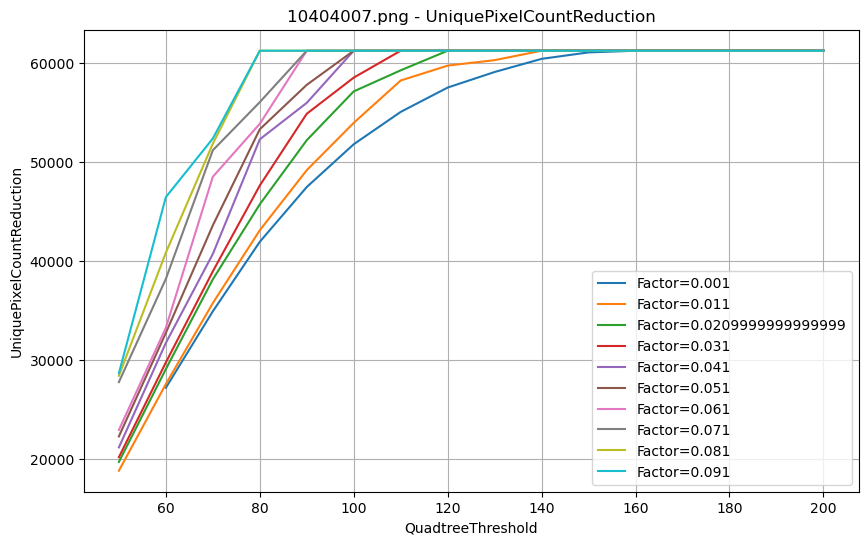

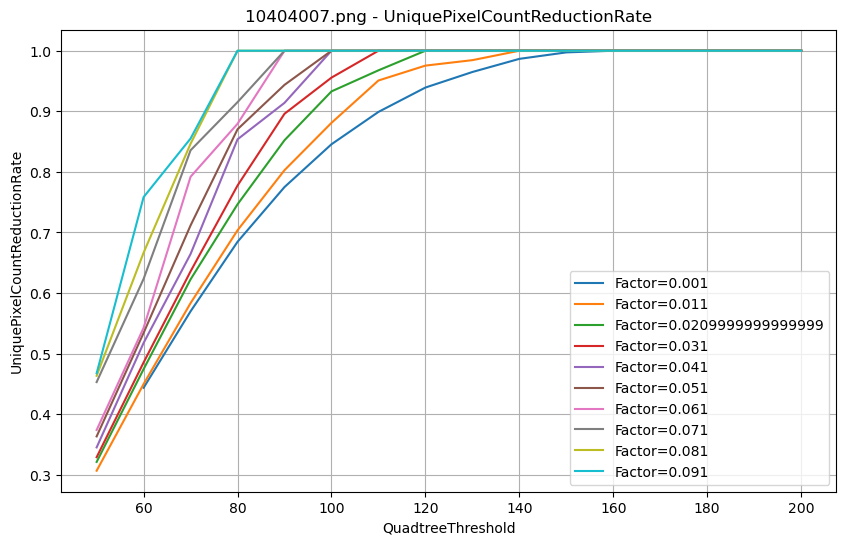

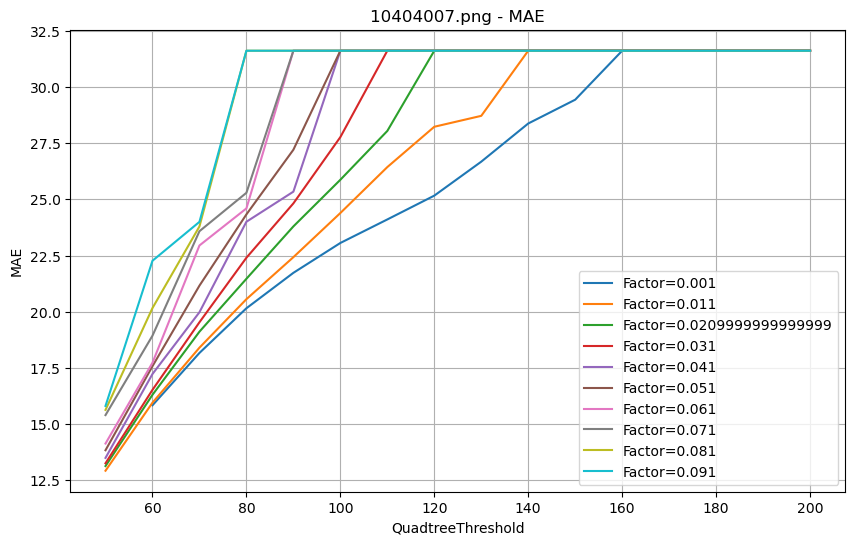

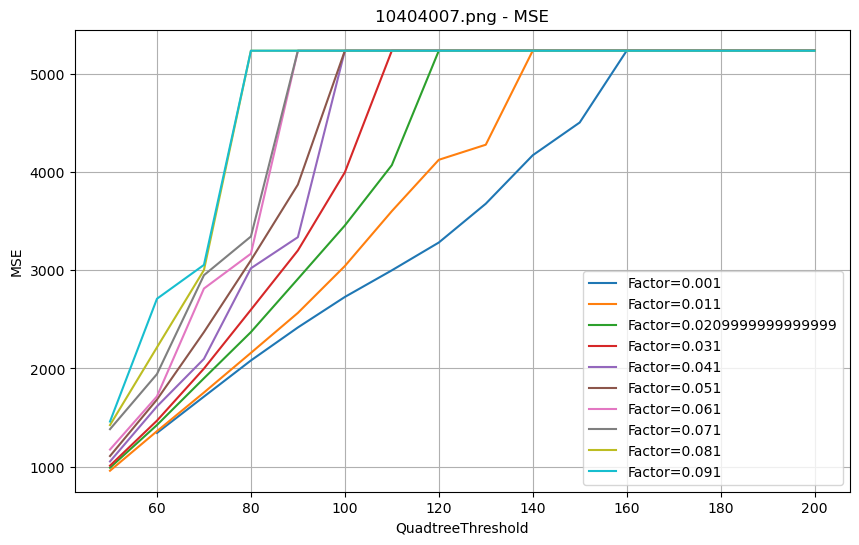

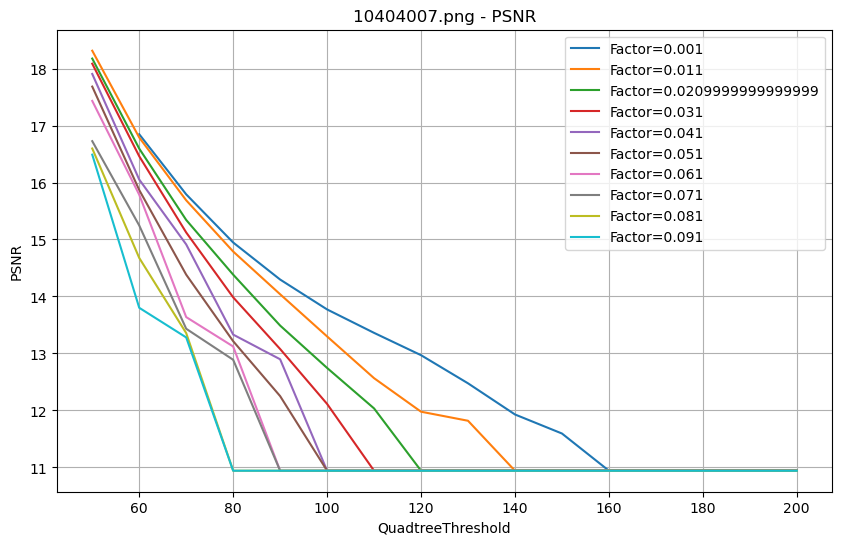

In [9]:
# List of metrics you're interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in filtered_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


In [12]:
grouped_data = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_3883/3335510817.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


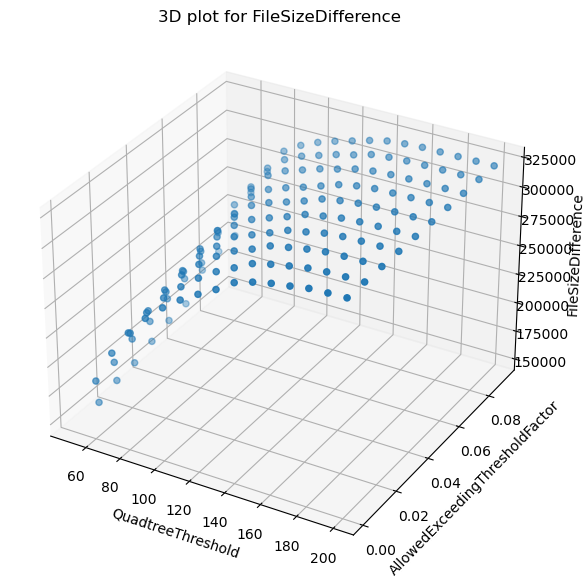

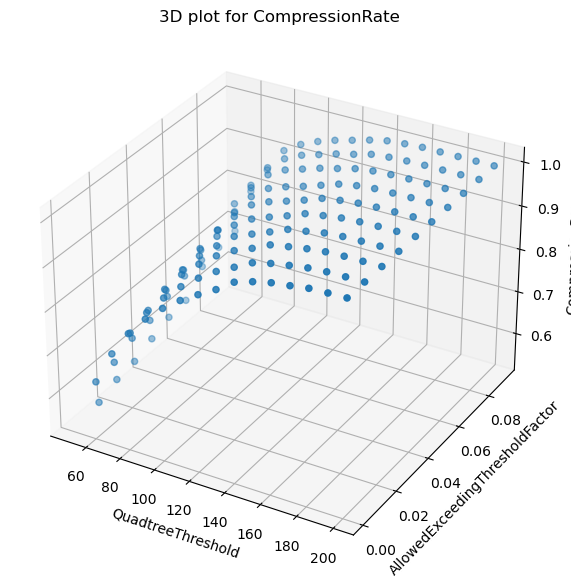

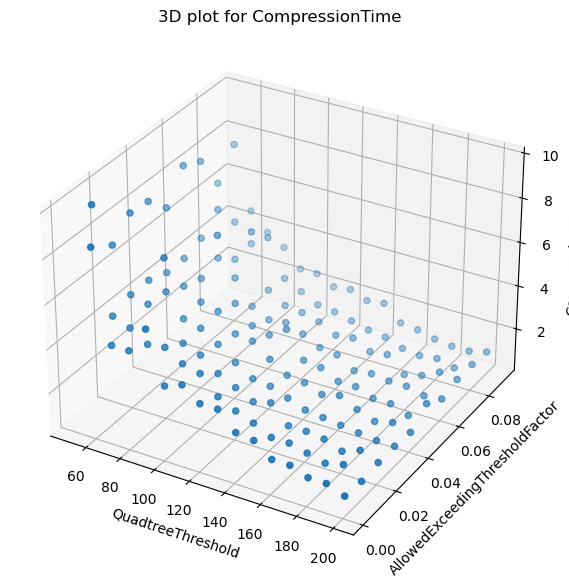

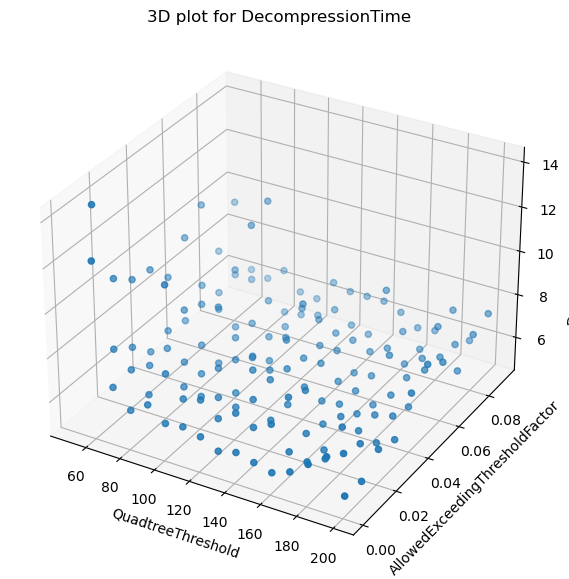

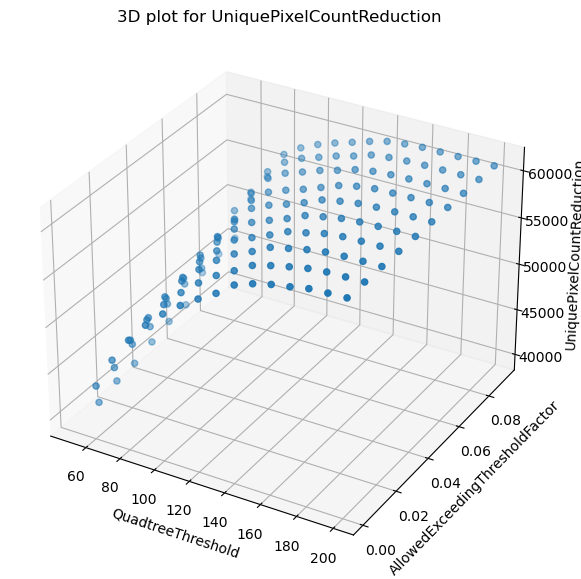

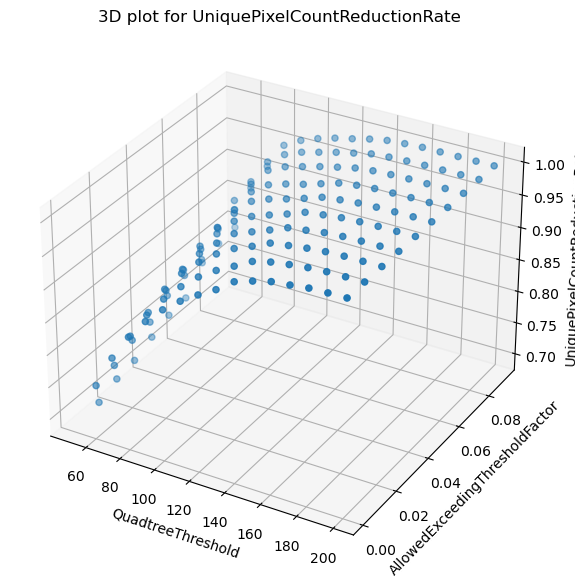

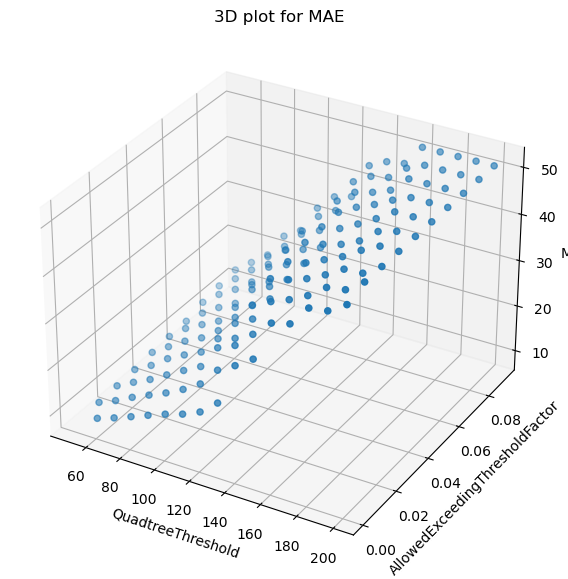

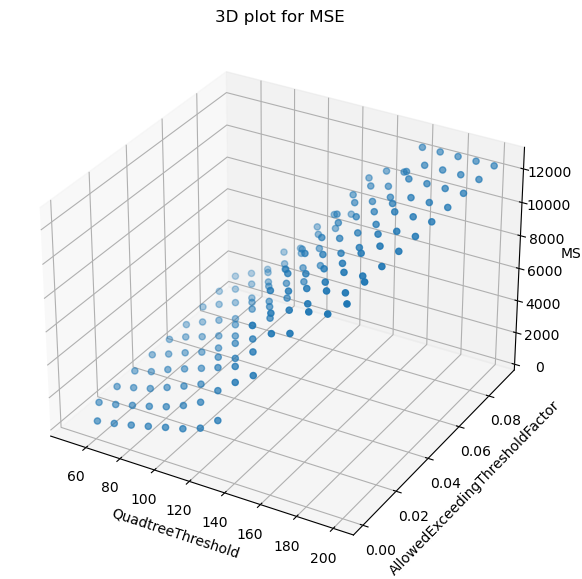

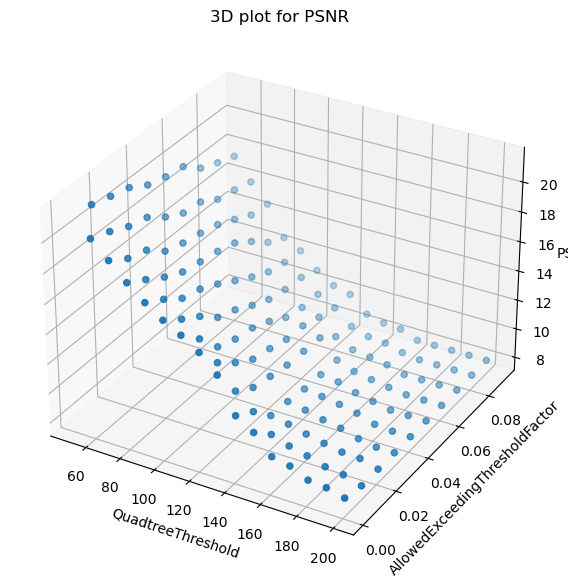

In [13]:
from mpl_toolkits.mplot3d import Axes3D

metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = grouped_data['QuadtreeThreshold']
    y = grouped_data['AllowedExceedingThresholdFactor']
    z = grouped_data[metric]
    
    ax.scatter(x, y, z)
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'3D plot for {metric}')
    
    plt.show()
